In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

from tensorflow.keras.utils import normalize
import os
import cv2
import keras
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
#from metrics import dice_loss
import glob
import os
import cv2
import PIL
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, Adamax
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
print ('modules loaded')


modules loaded


In [3]:
image_directory = '/content/drive/MyDrive/Dataset_Unet/train/Images/'
mask_directory = '/content/drive/MyDrive/Dataset_Unet/train/Masks/'

In [4]:
SIZE = 256
num_images = 521

Load images and masks in order so they match

In [5]:
image_names = glob.glob("/content/drive/MyDrive/Dataset_Unet/train/Images/*.png")
print(image_names)

['/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (86).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (361).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (358).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (81).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (365).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (349).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (347).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (208).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (343).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (363).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (72).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (70).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (78).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (350).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (215).png', '/content/driv

In [6]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (1).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (10).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (100).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (101).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (102).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (103).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (104).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (105).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (106).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (107).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (108).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (109).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (11).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (110).png', '/content/drive/MyDrive/Dataset_Unet/train/Images/IMG (111).png', '/content/dri

In [7]:
image_names_subset = image_names[0:num_images]

In [8]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [9]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

Read masks the same way. 

In [10]:

mask_names = glob.glob("/content/drive/MyDrive/Dataset_Unet/train/Masks/*.png")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
     

In [11]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (521, 256, 256, 1)
Mask data shape is:  (521, 256, 256, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211

In [12]:
#scaler = MinMaxScaler()

In [13]:
#test_image_data=scaler.fit_transform(image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [14]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.30, random_state = 42)


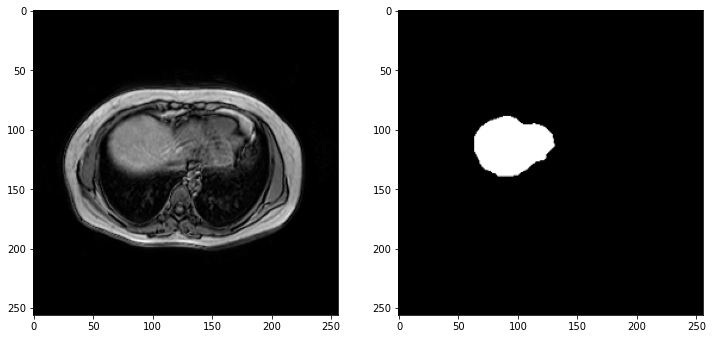

In [16]:
#Sanity check, view few mages
import random
image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')

plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [17]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K


#convolutional block
def conv_block(x, kernelsize, filters, dropout, batchnorm=False): 
    conv = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding="same")(x)
    if batchnorm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)
    conv = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding="same")(conv)
    if batchnorm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    return conv

'''
#residual convolutional block
def res_conv_block(x, kernelsize, filters, dropout, batchnorm=False):
    conv1 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        conv1 = layers.BatchNormalization(axis=3)(conv1)
    conv1 = layers.Activation('relu')(conv1)    
    conv2 = layers.Conv2D(filters, (kernelsize, kernelsize), kernel_initializer='he_normal', padding='same')(conv1)
    if batchnorm is True:
        conv2 = layers.BatchNormalization(axis=3)(conv2)
        conv2 = layers.Activation("relu")(conv2)
    if dropout > 0:
        conv2 = layers.Dropout(dropout)(conv2)
        
    #skip connection    
    shortcut = layers.Conv2D(filters, kernel_size=(1, 1), kernel_initializer='he_normal', padding='same')(x)
    if batchnorm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)
    shortcut = layers.Activation("relu")(shortcut)
    respath = layers.add([shortcut, conv2])       
    return respath
'''

#gating signal for attention unit
def gatingsignal(input, out_size, batchnorm=False):
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

#attention unit/block based on soft attention
def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), kernel_initializer='he_normal', padding='same')(x) 
    shape_theta_x = K.int_shape(theta_x)
    phi_g = layers.Conv2D(inter_shape, (1, 1), kernel_initializer='he_normal', padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3), strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]), kernel_initializer='he_normal', padding='same')(phi_g)
    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), kernel_initializer='he_normal', padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg) 
    upsample_psi = layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3), arguments={'repnum': shape_x[3]})(upsample_psi)                          
    y = layers.multiply([upsample_psi, x])
    result = layers.Conv2D(shape_x[3], (1, 1), kernel_initializer='he_normal', padding='same')(y)
    attenblock = layers.BatchNormalization()(result)
    return attenblock



#Attention U-NET
def attentionunet(input_shape, n_classes, dropout=0.2, batchnorm=True):
    
    filters = [16, 32, 64, 128, 256]
    kernelsize = 3
    upsample_size = 2

    inputs = layers.Input(input_shape) 

    # Downsampling layers    
    dn_1 = conv_block(inputs, kernelsize, filters[0], dropout, batchnorm)
    pool_1 = layers.MaxPooling2D(pool_size=(2,2))(dn_1)
    
    dn_2 = conv_block(pool_1, kernelsize, filters[1], dropout, batchnorm)
    pool_2 = layers.MaxPooling2D(pool_size=(2,2))(dn_2)
    
    dn_3 = conv_block(pool_2, kernelsize, filters[2], dropout, batchnorm)
    pool_3 = layers.MaxPooling2D(pool_size=(2,2))(dn_3)
    
    dn_4 = conv_block(pool_3, kernelsize, filters[3], dropout, batchnorm)
    pool_4 = layers.MaxPooling2D(pool_size=(2,2))(dn_4)
    
    dn_5 = conv_block(pool_4, kernelsize, filters[4], dropout, batchnorm)

    # Upsampling layers    
    gating_5 = gatingsignal(dn_5, filters[3], batchnorm)
    att_5 = attention_block(dn_4, gating_5, filters[3])
    up_5 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(dn_5)
    up_5 = layers.concatenate([up_5, att_5], axis=3)
    up_conv_5 = conv_block(up_5, kernelsize, filters[3], dropout, batchnorm)
    
    gating_4 = gatingsignal(up_conv_5, filters[2], batchnorm)
    att_4 = attention_block(dn_3, gating_4, filters[2])
    up_4 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_5)
    up_4 = layers.concatenate([up_4, att_4], axis=3)
    up_conv_4 = conv_block(up_4, kernelsize, filters[2], dropout, batchnorm)
   
    gating_3 = gatingsignal(up_conv_4, filters[1], batchnorm)
    att_3 = attention_block(dn_2, gating_3, filters[1])
    up_3 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_4)
    up_3 = layers.concatenate([up_3, att_3], axis=3)
    up_conv_3 = conv_block(up_3, kernelsize, filters[1], dropout, batchnorm)
    
    gating_2 = gatingsignal(up_conv_3, filters[0], batchnorm)
    att_2 = attention_block(dn_1, gating_2, filters[0])
    up_2 = layers.UpSampling2D(size=(upsample_size, upsample_size), data_format="channels_last")(up_conv_3)
    up_2 = layers.concatenate([up_2, att_2], axis=3)
    up_conv_2 = conv_block(up_2, kernelsize, filters[0], dropout, batchnorm)
    
    conv_final = layers.Conv2D(1, kernel_size=(1,1))(up_conv_2)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    
    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(conv_final)
    output_layer = Conv2D(1,kernel_size=1, strides=1, padding='same', activation='sigmoid')(conv_final)
    model = keras.models.Model(inputs, outputs)
    return model
    
    #if n_classes == 1:  #Binary
     # activation = 'sigmoid'
    #else:
     # activation = 'softmax'

    #outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    #print(activation)

    #model = Model(inputs, outputs, name="U-Net")
    #return model
  

In [18]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [73]:
model = attentionunet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_246 (Conv2D)            (None, 256, 256, 16  160         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_162 (Batch  (None, 256, 256, 16  64         ['conv2d_246[0][0]']             
 Normalization)                 )                                                           

In [88]:
history = model.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=1, 
                    epochs=15, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


Epoch 1/15
46/46 [==============================] - 29s 213ms/step - loss: 0.0438 - accuracy: 0.9957 - val_loss: 0.0435 - val_accuracy: 0.9942
Epoch 2/15
46/46 [==============================] - 8s 170ms/step - loss: 0.0412 - accuracy: 0.9957 - val_loss: 0.0433 - val_accuracy: 0.9945
Epoch 3/15
46/46 [==============================] - 8s 172ms/step - loss: 0.0385 - accuracy: 0.9958 - val_loss: 0.0438 - val_accuracy: 0.9944
Epoch 4/15
46/46 [==============================] - 9s 186ms/step - loss: 0.0362 - accuracy: 0.9960 - val_loss: 0.0381 - val_accuracy: 0.9946
Epoch 5/15
46/46 [==============================] - 8s 172ms/step - loss: 0.0343 - accuracy: 0.9959 - val_loss: 0.0356 - val_accuracy: 0.9946
Epoch 6/15
46/46 [==============================] - 9s 188ms/step - loss: 0.0325 - accuracy: 0.9960 - val_loss: 0.0411 - val_accuracy: 0.9941
Epoch 7/15
46/46 [==============================] - 8s 173ms/step - loss: 0.0311 - accuracy: 0.9959 - val_loss: 0.0372 - val_accuracy: 0.9945
Epoch

In [89]:
#Save the model for future use
model.save('/content/drive/MyDrive/Dataset_Unet/file.hdf5')

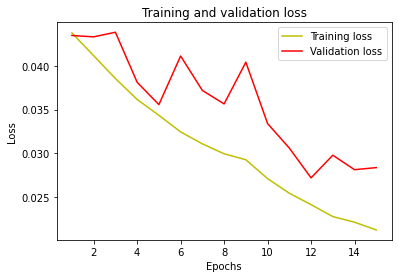

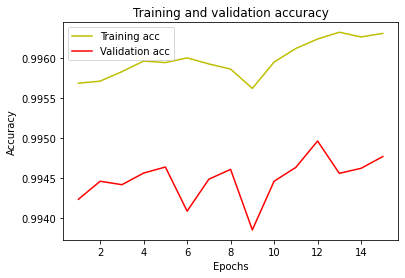

In [90]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

In [91]:

#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Dataset_Unet/file.hdf5", compile=True)
        
     
      

In [92]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

5/5 [==============================] - 1s 137ms/step


In [93]:
from tensorflow.keras.metrics import MeanIoU

In [94]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.93844134


(1, 256, 256, 1)
1/1 [==============================] - 0s 43ms/step
(256, 256)


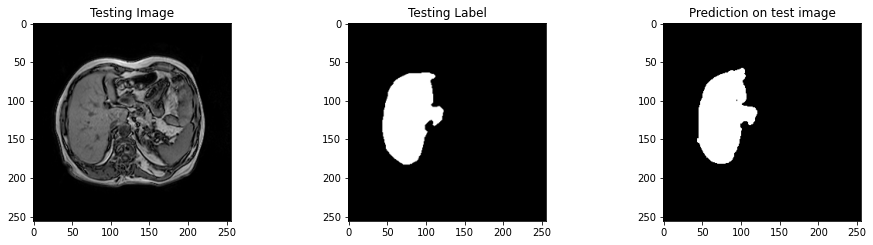

In [121]:
threshold = 0.5
test_img_number =  random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.grid(False)
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.grid(False)
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.grid(False)
plt.imshow(prediction, cmap='gray')
plt.show()